<a href="https://colab.research.google.com/github/ririnoia/playground/blob/master/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = np.array([[2, 6, 12, 132, 16, 16, 4, 0, 0],
[2, 7, 12, 151, 16, 16, 4, 0, 0],
[2, 8, 12, 151, 16, 16, 4, 0, 1],
[2, 9, 12, 151, 16, 16, 4, 0, 1],
[2, 10, 12, 174, 16, 16, 9, 0, 0],
[2, 11, 12, 174, 16, 16, 9, 0, 1],
[2, 12, 12, 190, 16, 16, 10, 0, 0],
[2, 13, 12, 200, 17, 17, 11, 0, 0],
[2, 14, 12, 214, 21, 21, 11, 1, 0],
[2, 15, 12, 214, 21, 21, 11, 1, 1],
[2, 16, 12, 214, 21, 21, 11, 1, 1],
[2, 17, 12, 487, 46, 38, 12, 1, 0],
[2, 18, 12, 523, 53, 44, 12, 1, 0],
[2, 19, 12, 532, 60, 50, 14, 1, 0],
[2, 20, 12, 603, 70, 60, 16, 1, 0],
[2, 21, 12, 693, 79, 69, 16, 1, 0],
[2, 22, 12, 778, 90, 80, 17, 1, 0],
[2, 23, 12, 874, 114, 102, 17, 1, 0],
[2, 24, 12, 913, 126, 114, 17, 1, 0],
[2, 25, 12, 1017, 140, 128, 17, 1, 0],
[2, 26, 12, 1061, 149, 136, 22, 1, 0],
[2, 27, 12, 1229, 171, 156, 26, 3, 0],
[2, 28, 12, 1380, 195, 180, 26, 4, 0],
[2, 29, 12, 1510, 215, 197, 27, 5, 0],
[3, 1, 12, 1688, 224, 206, 27, 5, 0],
[3, 2, 12, 1784, 239, 221, 27, 6, 0],
[3, 3, 12, 1855, 253, 230, 30, 6, 0],
[3, 4, 12, 5690, 269, 246, 31, 6, 0],
[3, 5, 12, 5948, 302, 276, 32, 6, 0],
[3, 6, 12, 6647, 333, 302, 50, 6, 0]])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 16.  16.  16.  16.  16.  16.  16.  17.  21.  21.  21.  38.  44.  50.
  60.  69.  80. 102. 114. 128. 136. 156. 180. 197. 206. 221. 230. 246.
 276. 302.]


<function matplotlib.pyplot.show>

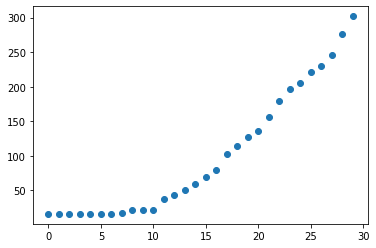

In [0]:
i = 0
x = np.arange(len(data))
y = np.array([])

while i < len(data):
  y = np.append(y,data[i][5])
  i = i+1

print(x)
print(y)

plt.plot(x, y, 'o')
plt.show

In [0]:
mu = x.mean()
sigma = x.std()

def standarize(x):
  return (x - mu) / sigma

z = standarize(x)

In [0]:
t = np.random.rand(3)

def matrix(x):
  return np.vstack([np.ones(x.shape[0]),x , x**2]).T

X = matrix(z)

def f(x):
  return np.dot(x, t)

def E(x, y):
  return 0.5 * np.sum((y - f(x) ** 2))

ETA = 1e-3
diff = 1
count = 0

error = E(X, y)

while diff > 1e-5:
  t = t - ETA * np.dot(f(X) - y, X)
  current_error = E(X, y)
  diff = error - current_error
  error = current_error

  count += 1
  print(count, t[0], t[1], t[2], diff)

1 3.659379146718794 2.989302417284458 4.215184669351841 1252.0882164273203
2 6.450142232236674 5.460266858113139 7.6760308125674515 2868.4749513621027
3 9.05335704089255 7.857102365716958 10.8665455471483 4145.1547750477175
4 11.482759963251324 10.182032808092664 13.806931566897646 5138.27505247095
5 13.751069217346855 12.437215337197099 16.51589014644972 5895.392801020258
6 15.870060436432958 14.6247423904284 19.01073264283365 6456.745582952342
7 17.85063664405496 16.746643632062764 21.307483717250427 6856.337434651246
8 19.702893033215798 18.804887836448096 23.42097689188874 7122.866526846334
9 21.43617693546266 20.801384714701868 25.364943010950757 7280.517414240188
10 23.05914333707026 22.737986686608025 27.152092132794746 7349.637447175439
11 24.57980627297431 24.616490599357 28.79418934097508 7347.314103303244
12 26.005586404555828 26.438639394723506 30.302124925739772 7287.867586233551
13 27.34335506464696 28.206123726229016 31.68597935401432 7183.270973033708
14 28.599475032087

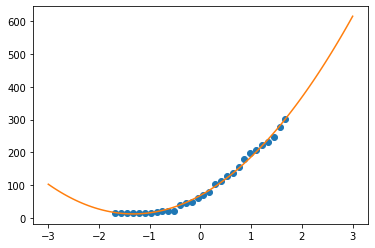

324.8773587556692


In [0]:
x = np.linspace(-3, 3, 100)

plt.plot(z, y, 'o')
plt.plot(x, f(matrix(x)))
plt.show()

def pre(day):
  return -1.67524673 + 0.11553426 * (day-1)
print((t[2] * (pre(31) ** 2) + (t[1] * pre(31)) + t[0]))